Observable Trends:
1. Perhaps as expected, 2/3 of the rides and shares are in urban areas, with less than 10% being in rural areas.  
2. However the average fare is considerably higher in rural areas.  Urban fares are generally under $30 on average whereas rural fares are generally over $30 on average.  
3. There are also fewer drivers in rural areas, indicating that these drivers make more per fare than drivers in urban areas.  Something to look into further would be if the number of fares in rural areas are due to the lack of population (opportunity) or higher fares (assuming due to distance of the ride?)
4. Additional data could be gathered from time of day...are more rides requested at night, during the day, evenly distributed by city type, etc.  

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data)
ride_df=pd.read_csv(ride_data)
# Combine the data into a single dataset
pyber_df=pd.merge(ride_df, city_df, on="city", how="left")
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

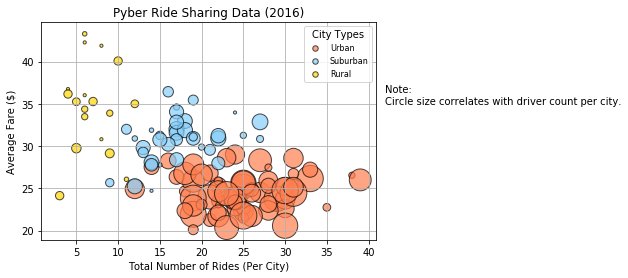

In [134]:
# Obtain the x and y coordinates for each of the three city types
urbancity=pyber_df[pyber_df["type"]=="Urban"].groupby([pyber_df["city"]])
suburbancity=pyber_df[pyber_df["type"]=="Suburban"].groupby([pyber_df["city"]])
ruralcity=pyber_df[pyber_df["type"]=="Rural"].groupby([pyber_df["city"]])

urban_x=urbancity["city"].value_counts()
urbanfaresum=urbancity["fare"].sum()
urban_y=urbanfaresum/urban_x
urban_size=urbancity["driver_count"].mean()

suburban_x=suburbancity["city"].value_counts()
suburbanfaresum=suburbancity["fare"].sum()
suburban_y=suburbanfaresum/suburban_x
suburban_size=suburbancity["driver_count"].mean()

rural_x=ruralcity["city"].value_counts()
ruralfaresum=ruralcity["fare"].sum()
rural_y=ruralfaresum/rural_x
rural_size=ruralcity["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y,s=urban_size*10,c="coral",alpha=0.7, edgecolors="black",label="Urban")
plt.scatter(suburban_x, suburban_y,s=suburban_size*10,c="lightskyblue",alpha=0.7,edgecolors="black",label="Suburban")
plt.scatter(rural_x, rural_y, s=rural_size*10,c="gold",alpha=0.7,edgecolors="black",label="Rural")
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
legend=plt.legend(fontsize=8, title="City Types", loc="best")
legend.legendHandles[0]._sizes=[30]
legend.legendHandles[1]._sizes=[30]
legend.legendHandles[2]._sizes=[30]
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.",fontsize=10)

# Save Figure
plt.savefig("C:/Images/PyberRideSharingData2016.png")

plt.show()

In [6]:
# Show plot

## Total Fares by City Type

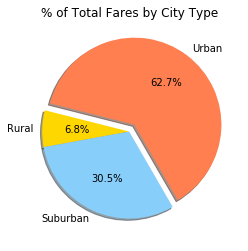

In [137]:
# Calculate Type Percents
totalfaresum=pyber_df["fare"].sum()
urbanfaresumtotal=urbanfaresum.sum()
suburbanfaresumtotal=suburbanfaresum.sum()
ruralfaresumtotal=ruralfaresum.sum()
urbanpercent=(urbanfaresumtotal/totalfaresum)*100
suburbanpercent=(suburbanfaresumtotal/totalfaresum)*100
ruralpercent=(ruralfaresumtotal/totalfaresum)*100


# Build Pie Chart
size=[urbanpercent,ruralpercent,suburbanpercent]
colors=["coral","gold","lightskyblue"]
explode=[.1,0,0]
labels=["Urban","Rural","Suburban"]
plt.title("% of Total Fares by City Type")

plt.pie(size,explode,labels,colors,startangle=300,autopct='%1.1f%%',shadow=True,)

# Save Figure
plt.savefig("C:/Images/TotalFaresbyCityType.png")

plt.show()


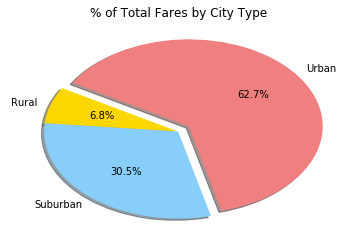

In [4]:
# Show Figure

## Total Rides by City Type

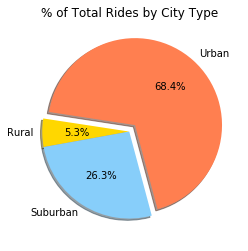

In [125]:
# Calculate Ride Percents
totalridesum=pyber_df["type"].count()
citytypesum=pyber_df["type"].value_counts()

urbanpercent1=(citytypesum[0]/totalridesum)*100
suburbanpercent1=(citytypesum[1]/totalridesum)*100
ruralpercent1=(citytypesum[2]/totalridesum)*100

# Build Pie Chart
size=[urbanpercent1,ruralpercent1,suburbanpercent1]
colors=["coral","gold","lightskyblue"]
explode=[.1,0,0]
labels=["Urban","Rural","Suburban"]
plt.title("% of Total Rides by City Type")

plt.pie(size,explode,labels,colors,startangle=285,autopct='%1.1f%%',shadow=True,)
# Save Figure
plt.savefig("C:/Images/TotalRidesbyCityType.png")

plt.show()


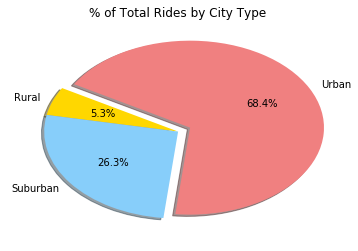

In [5]:
# Show Figure

## Total Drivers by City Type

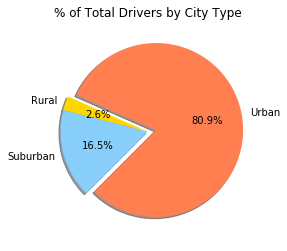

In [135]:
# Calculate Driver Percents
totaldriversum=pyber_df["driver_count"].sum()
driver_sum=city_df.groupby(["type"])
driver_sum_type=driver_sum["driver_count"].sum()

urbanpercent2=(driver_sum_type[2]/totaldriversum)*100
suburbanpercent2=(driver_sum_type[1]/totaldriversum)*100
ruralpercent2=(driver_sum_type[0]/totaldriversum)*100

# Build Pie Charts
size=[urbanpercent2,ruralpercent2,suburbanpercent2]
colors=["coral","gold","lightskyblue"]
explode=[.1,0,0]
labels=["Urban","Rural","Suburban"]
plt.title("% of Total Drivers by City Type")

plt.pie(size,explode,labels,colors,startangle=225,autopct='%1.1f%%',shadow=True,)

# Save Figure
plt.savefig("C:/Images/TotalDriversbyCityType.png")

plt.show()

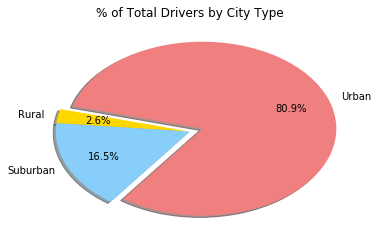

In [6]:
# Show Figure